# 🌟 ESTUDIO SOBRE JUGADORES DE MINECRAFT BASADO EN DATOS DE DISCORD 🎮
## Hecho por Tomás Berni

Este proyecto tiene como objetivo principal analizar diversos aspectos de los jugadores de Minecraft mediante un dataset recopilado de usuarios de Discord. 📊 A través de este análisis, buscamos obtener información relevante que nos permita entender mejor la demografía, preferencias y comportamientos de los jugadores. El estudio se enfoca en las siguientes áreas clave:

### 1. **Distribución de Edades de los Jugadores** 🎂
Se analizará cómo se distribuyen las edades de los jugadores, proporcionando una visión general del grupo etario predominante.

### 2. **Edad Promedio de los Jugadores** 📈
Se calculará la edad promedio para identificar la media de los jugadores en la comunidad.

### 3. **Distribución de Clientes de Minecraft (Bedrock vs Java)** 💻
Exploraremos qué porcentaje de jugadores utiliza las diferentes versiones de Minecraft, ya sea Bedrock o Java.

### 4. **Distribución de Edades que Utilizan Java vs Bedrock** 🔄
Además, veremos cómo se distribuyen las edades de los jugadores en cada versión del cliente de Minecraft.

### 5. **Distribución de Versiones "Cracked" vs "Paid"** 🔒
Analizaremos cuántos jugadores están utilizando versiones "Cracked" (no oficiales) versus aquellos que usan versiones pagas ("Paid").

### 6. **Distribución de Versiones Cracked vs Paid y Correlación con la Edad** 📉
Estudiaremos la relación entre la edad de los jugadores y el tipo de versión de Minecraft que utilizan (Cracked o Paid).

### 7. **Relación entre el Nombre de Discord y el Nombre de Minecraft** 🔗
Se analizará si existe alguna correlación o patrón entre los nombres de usuario de Discord y Minecraft.

### 8. **Relación entre Edad, Cliente y Versión Utilizada** ⚖️
Finalmente, exploraremos las interacciones entre la edad de los jugadores, el cliente de Minecraft (Bedrock vs Java) que utilizan, y si su versión es Cracked o Paid.

### **Datos Utilizados** 🗂️
La base de datos utilizada en este estudio contiene las siguientes variables clave:
- **age**: Edad del jugador
- **discordid**: ID del jugador en Discord
- **minecraftid**: ID del jugador en Minecraft
- **client**: Cliente de Minecraft utilizado (Bedrock o Java)
- **version**: Versión de Minecraft utilizada (Cracked o Paid)

### **Conclusiones** 📝

#### 1. **Distribución de Edades de los Jugadores** 
Se observa que el jugador más joven tiene 1 año, mientras que el más viejo tiene 43 años. Esto indica una amplia gama de edades entre los jugadores de Minecraft y los usuarios de Discord.

#### 2. **Edad Promedio de los Jugadores** 
La edad promedio de los jugadores es de 16.74 años, lo que sugiere que la mayoría de los usuarios de Discord y Minecraft se encuentran en la adolescencia.

#### 3. **Distribución de Clientes de Minecraft (Bedrock vs Java)** 
Se puede observar que el 81.4% de los jugadores que utilizan Discord y Minecraft son jugadores de Java, mientras que solo el 18.6% opta por la versión Bedrock.

#### 4. **Distribución de Edades que Utilizan Java vs Bedrock** 
En la distribución de edades, se concluye que no hay un impacto significativo en la elección de la versión entre la población estudiada.

#### 5. **Distribución de Versiones "Cracked" vs "Paid"** 
Se evidencia que el 81.2% de los jugadores utiliza la versión crackeada del juego, mientras que apenas el 18.8% juega la versión paga.

#### 6. **Distribución de Versiones Cracked vs Paid y Correlación con la Edad** 
Aunque la diferencia es mínima, se puede visualizar que los jugadores más jóvenes tienden a utilizar en mayor medida la versión no paga del juego.

#### 7. **Relación entre el Nombre de Discord y el Nombre de Minecraft** 
Se establece que el 28.4% de los nombres estan compuesto por su nombre en Discord o viceversa.

#### 8. **Relación entre Edad, Cliente y Versión Utilizada** 
Se observa que en la versión Java, los jugadores más jóvenes son más propensos a utilizar la versión crackeada en comparación con aquellos de mayor edad. Por otro lado, en Bedrock se muestra un equilibrio en el uso de ambas versiones entre los jugadores.


### Importaciones

In [45]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

### **Carga y exploracion de datos**

In [46]:
# Cargar los datos
ruta = "\\Users\\TB\\Downloads\\Minecraft Proyect\\piracydataset.csv"
df = pd.read_csv(ruta)
df.head()

,Unnamed: 0,age,discordid,minecraftid,client,version
0,0,14.0,ProGamer300#3331,ProGamer300,Computer ( Java Edition ),Cracked
1,1,19.0,@shrey#4934,shrey_jain_,Computer ( Java Edition ),Cracked
2,2,18.0,Skullfaced#8657,Skullfaceddeath,Computer ( Java Edition ),Paid Version
3,3,17.0,Op DzGhOsT#8719,DzGHoST1737,Computer ( Java Edition ),Cracked
4,4,15.0,Dwijesh#6020,Dwijesh YT,Mobile ( bedrock version ),Paid Version


### **Verificacion de datos duplicados**

In [47]:
#Limpieza de datos duplicados
duplicados = df[df.duplicated(keep=False)]
print(duplicados)
#No hay duplicados

Empty DataFrame
Columns: [Unnamed: 0, age, discordid, minecraftid, client, version]
Index: []


### 1. **Distribución de edades de los jugadores**
   Se analizará cómo se distribuyen las edades de los jugadores, proporcionando una visión general del grupo etario predominante.

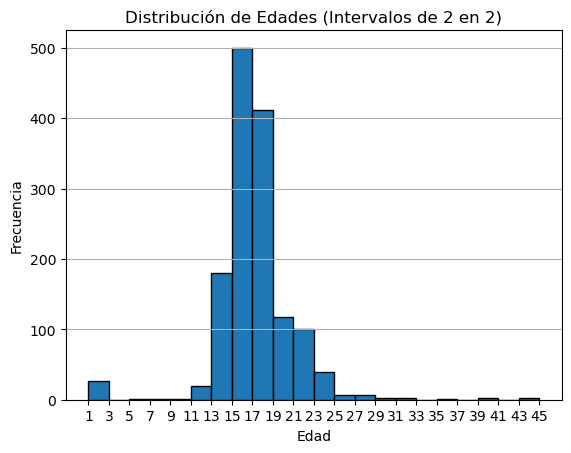

In [48]:
#Distribucion de edades de los jugadores
plt.hist(df['age'], bins=range(1, 46, 2), edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades (Intervalos de 2 en 2)')
plt.xticks(range(1, 46, 2))
plt.grid(axis='y')  
plt.show()

### 2. **Edad promedio de los jugadores**
   Se calculará la edad promedio para identificar la media de los jugadores en la comunidad.

El jugador con más edad tiene: 43.0
El jugador con menos edad tiene: 1.0
El jugador promedio de Minecraft tiene: 16.740506329113924 años


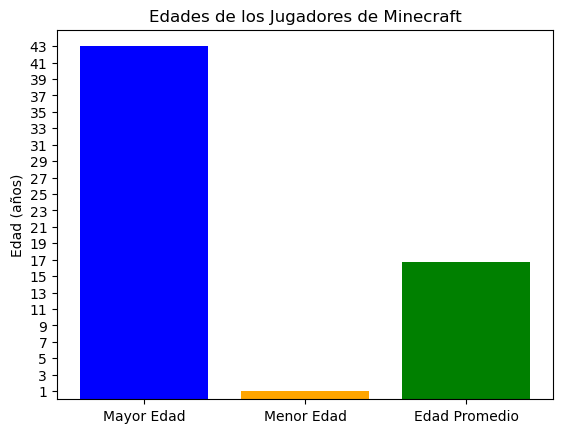

In [49]:
#Edad promedio de los jugadores
max_age = df['age'].max()
print("El jugador con más edad tiene:", max_age)

min_age = df['age'].min()
print("El jugador con menos edad tiene:", min_age)

pro_age = df['age'].mean()
print("El jugador promedio de Minecraft tiene:", pro_age,"años")

#Grafico
plt.bar(etiquetas, edades, color=['blue', 'orange', 'green'])
plt.yticks(range(1, 45, 2))  

plt.ylabel('Edad (años)')
plt.title('Edades de los Jugadores de Minecraft')
plt.ylim(0, 45)  
plt.show()

### 3. **Distribución de Clientes de Minecraft (Bedrock vs Java)**
   Exploraremos qué porcentaje de jugadores utiliza las diferentes versiones de Minecraft, ya sea Bedrock o Java.


Número de valores distintos en la columana'client': 2


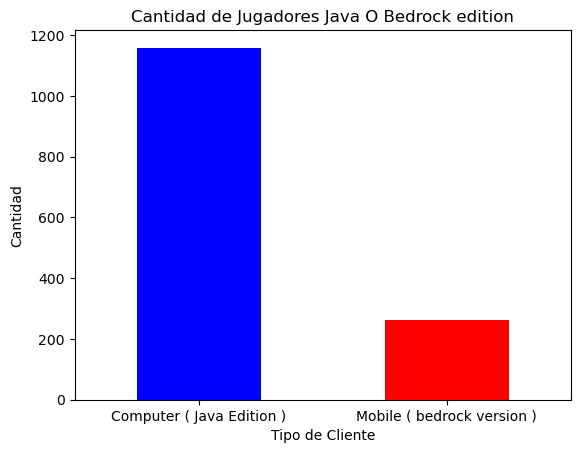

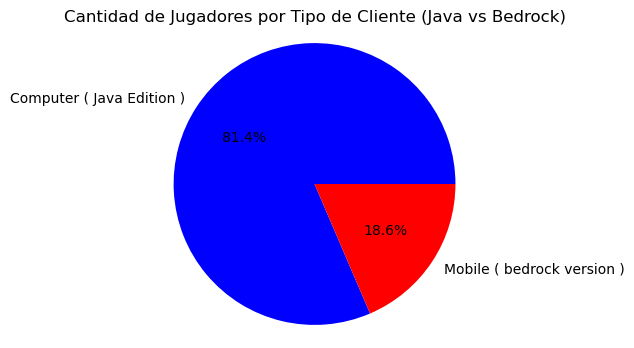

In [50]:
#Distribucion de Clientes de Minecraft (BEDROCK VS JAVA)
n_distintos = df['client'].nunique()
print("Número de valores distintos en la columana'client':", n_distintos)

conteo_clientes = df['client'].value_counts()

#Grafico 1 barras
conteo_clientes.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Tipo de Cliente')
plt.ylabel('Cantidad')
plt.title('Cantidad de Jugadores Java O Bedrock edition')
plt.xticks(rotation=0)
plt.show

#Grafico 2 pastel
plt.figure(figsize=(4, 4))
plt.pie(conteo_clientes, labels=conteo_clientes.index, autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Cantidad de Jugadores por Tipo de Cliente (Java vs Bedrock)')
plt.axis('equal') 
plt.show()

### 4. **Distribución de edades que utilizan Java vs Bedrock**
   Además, veremos cómo se distribuyen las edades de los jugadores en cada versión del cliente de Minecraft.


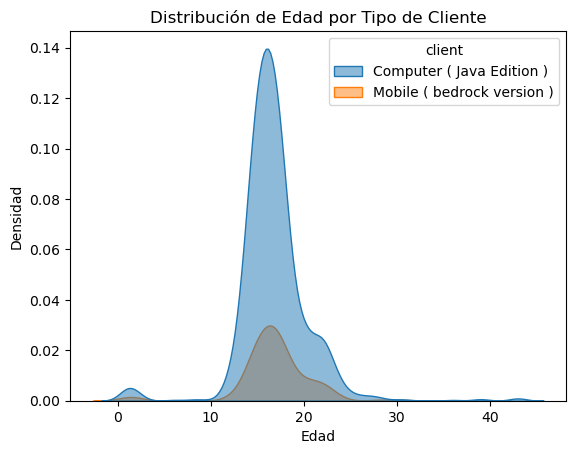

In [51]:
#Distribucion de EDAD que utilizan JAVA vs BEDROCK
sns.kdeplot(data=df, x='age', hue='client', fill=True, alpha=0.5)
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.title('Distribución de Edad por Tipo de Cliente')
plt.show()

### 5. **Distribución de versiones "Cracked" vs "Paid"**
   Analizaremos cuántos jugadores están utilizando versiones "Cracked" (no oficiales) versus aquellos que usan versiones pagas ("Paid").

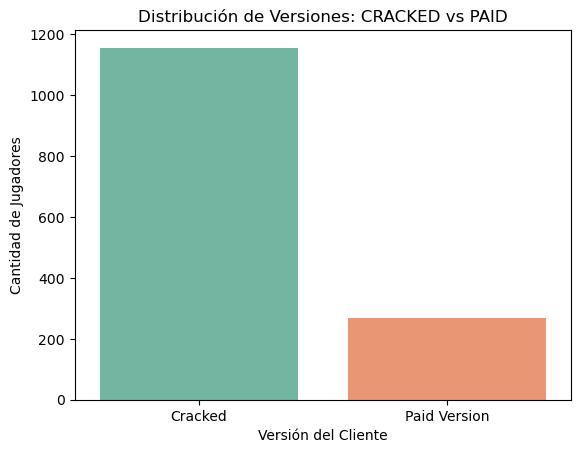

In [52]:
#Distribución de versiones "CRACKED" vs "PAID"

conteo_versiones = df['version'].value_counts()

sns.countplot(data=df, x='version', hue="version", palette='Set2', legend=False)
plt.xlabel('Versión del Cliente')
plt.ylabel('Cantidad de Jugadores')
plt.title('Distribución de Versiones: CRACKED vs PAID')
plt.show()



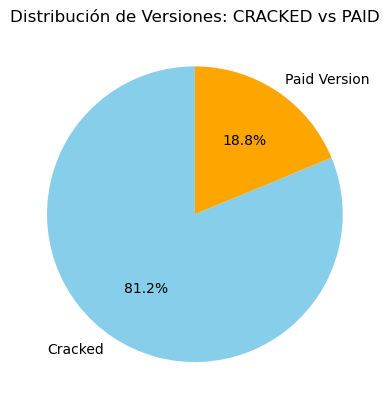

In [9]:
#Distribucion de versiones CRACKED VS PAID 
version_counts = df['version'].value_counts()
version_counts.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90)
plt.ylabel('') 
plt.title('Distribución de Versiones: CRACKED vs PAID')
plt.show()


### 6. **Distribución de versiones Cracked vs Paid y correlación con la edad**
   Estudiaremos la relación entre la edad de los jugadores y el tipo de versión de Minecraft que utilizan (Cracked o Paid).

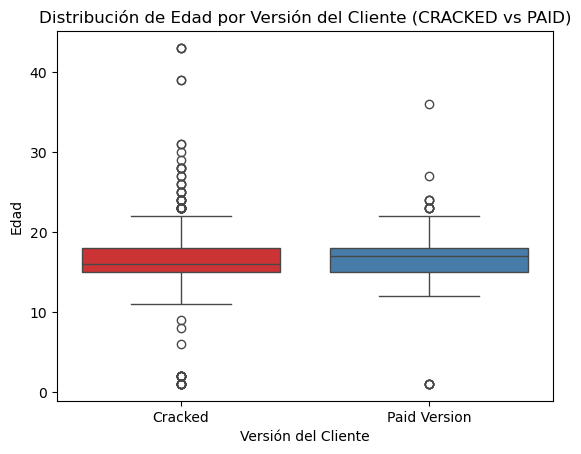

               count       mean       std  min   25%   50%   75%   max
version                                                               
Cracked       1155.0  16.682251  3.803490  1.0  15.0  16.0  18.0  43.0
Paid Version   267.0  16.992509  3.588822  1.0  15.0  17.0  18.0  36.0


In [53]:
#Distribucion de versiones CRACKED VS PAID Y Correlacion de edad entre estas
#Distribucion de EDAD que utilizan JAVA vs BEDROCK

sns.boxplot(data=df, x='version', y='age', hue="version", palette='Set1')
plt.xlabel('Versión del Cliente')
plt.ylabel('Edad')
plt.title('Distribución de Edad por Versión del Cliente (CRACKED vs PAID)')
plt.show()


descripcion = df.groupby('version')['age'].describe()
print(descripcion)

### 7. **Relación entre el nombre de Discord y el nombre de Minecraft**
   Se analizará si existe alguna correlación o patrón entre los nombres de usuario de Discord y Minecraft.

Precisión del modelo es de: 0.74
              precision    recall  f1-score   support

           0       0.74      0.99      0.84       204
           1       0.75      0.11      0.19        81

    accuracy                           0.74       285
   macro avg       0.74      0.55      0.52       285
weighted avg       0.74      0.74      0.66       285

Porcentaje de Similares: 28.42%
Porcentaje de No Similares: 71.58%


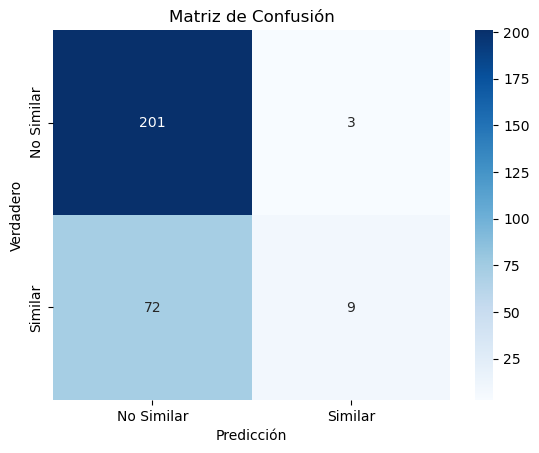

In [54]:
#Relacion entre el nombre de discord y el nombre de minecraft

#Tuve que eliminar los ultimos 5 digitos de la columna porque modificaban los resultados y esos numeros eran aleatorios de Discord

# Función para limpiar los IDs de Discord
def limpiar_discord_id(discordid):
    return discordid.str[:-5]

# Función para etiquetar la similitud
def etiquetar_similitud(discord, minecraft):
    if discord.lower() == minecraft.lower():
        return 1
    
    discord_base = discord.split('_')[0]
    minecraft_base = minecraft.split('_')[0]
    
    if discord_base == minecraft_base or discord_base in minecraft or minecraft_base in discord:
        return 1
    
    return 0

# Limpiar los IDs de Discord
df['discordid'] = limpiar_discord_id(df['discordid'])

# Crear la columna de etiquetas usando vectorización
df['similarity_label'] = df.apply(lambda row: etiquetar_similitud(row['discordid'], row['minecraftid']), axis=1)

# Combinar nombres
df['combined_names'] = df['discordid'] + ' ' + df['minecraftid']

# Vectorizar nombres combinados
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['combined_names'])

# Variable objetivo
y = df['similarity_label']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predecir y evaluar
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo es de: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcular porcentajes
total = cm.sum()
porcentaje_similares = (cm[1, 1] + cm[1, 0]) / total * 100  # Similares
porcentaje_no_similares = (cm[0, 0] + cm[0, 1]) / total * 100  # No Similares

# Imprimir porcentajes
print(f'Porcentaje de Similares: {porcentaje_similares:.2f}%')
print(f'Porcentaje de No Similares: {porcentaje_no_similares:.2f}%')

# Visualizar matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Similar', 'Similar'], yticklabels=['No Similar', 'Similar'])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

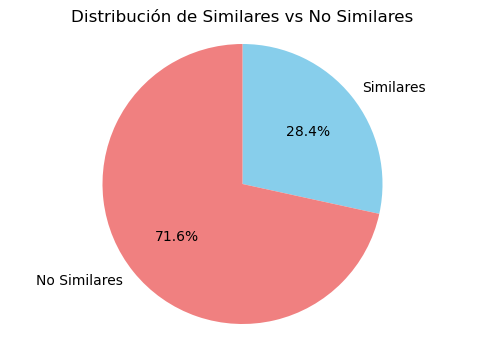

In [12]:
# Grafico pastel

labels = ['Similares', 'No Similares']
sizes = [porcentaje_similares, porcentaje_no_similares]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)

plt.title('Distribución de Similares vs No Similares')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.show()

### 8. **Relación entre edad, cliente y versión utilizada**
   Finalmente, exploraremos las interacciones entre la edad de los jugadores, el cliente de Minecraft (Bedrock vs Java) que utilizan, y si su versión es Cracked o Paid.

                                         count       mean       std  min  \
client                     version                                         
Computer ( Java Edition )  Cracked       973.0  16.647482  3.796263  1.0   
                           Paid Version  185.0  17.081081  3.642879  1.0   
Mobile ( bedrock version ) Cracked       182.0  16.868132  3.847102  1.0   
                           Paid Version   82.0  16.792683  3.477397  1.0   

                                          25%   50%   75%   max  
client                     version                               
Computer ( Java Edition )  Cracked       15.0  16.0  18.0  43.0  
                           Paid Version  15.0  17.0  19.0  36.0  
Mobile ( bedrock version ) Cracked       15.0  17.0  18.0  31.0  
                           Paid Version  15.0  17.0  18.0  24.0  


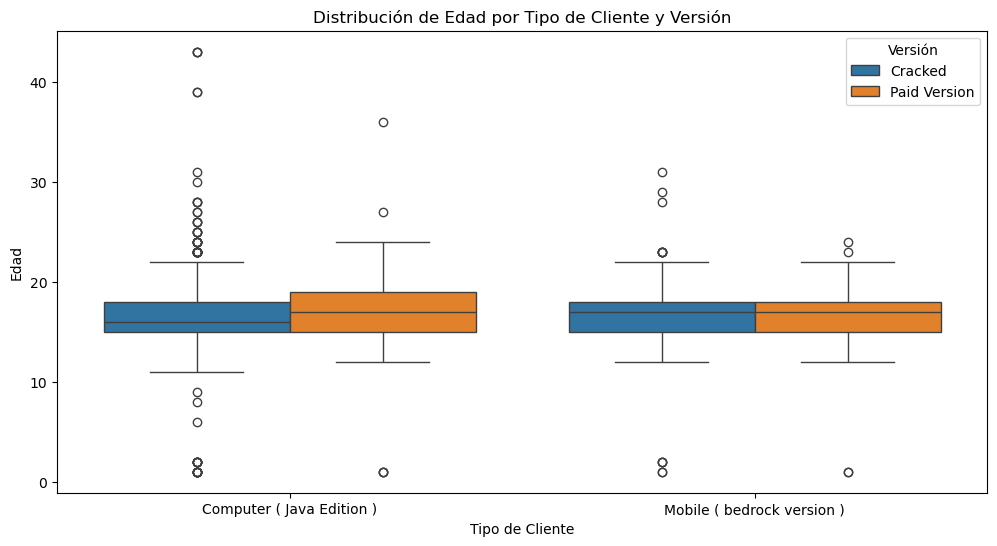

In [55]:
#Relacion entre EDAD, CLIENTE Y VERSION utilizada
age_summary = df.groupby(['client', 'version'])['age'].describe()
print(age_summary)
# Grafico
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='client', y='age', hue='version')
plt.title('Distribución de Edad por Tipo de Cliente y Versión')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Edad')
plt.legend(title='Versión')
plt.show()


                      age  client_encoded  version_encoded
age              1.000000        0.013219         0.032194
client_encoded   0.013219        1.000000         0.150330
version_encoded  0.032194        0.150330         1.000000


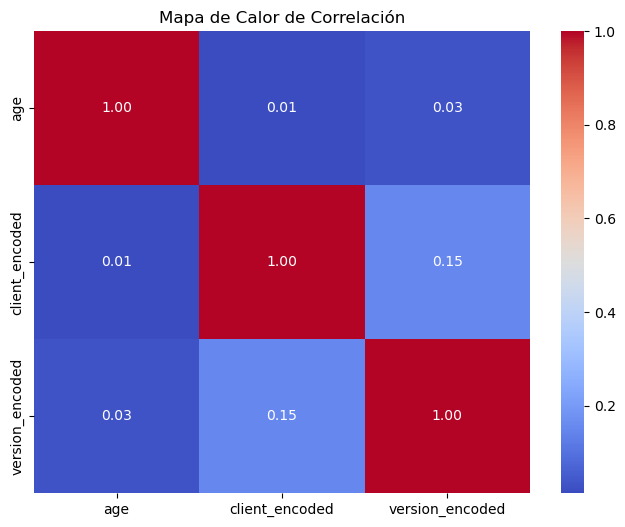

In [56]:
# Codificar variables categóricas
label_encoder_client = LabelEncoder()
df['client_encoded'] = label_encoder_client.fit_transform(df['client'])

label_encoder_version = LabelEncoder()
df['version_encoded'] = label_encoder_version.fit_transform(df['version'])

# Calcular la correlación
correlation = df[['age', 'client_encoded', 'version_encoded']].corr()
print(correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación')
plt.show()
